# **10차시: 컬럼 정제와 파생변수 그리고 구간화**
## 🔍 **학습목표**
1. 데이터 분석 목적에 맞지 않는 **컬럼을 제거**할 수 있다.
2. 기존 컬럼을 조합해 **파생변수를 생성**할 수 있다.
3. 연속형 수치 데이터를 cut, qcut으로 **구간화하여 범주형으로 변환**할 수 있다.

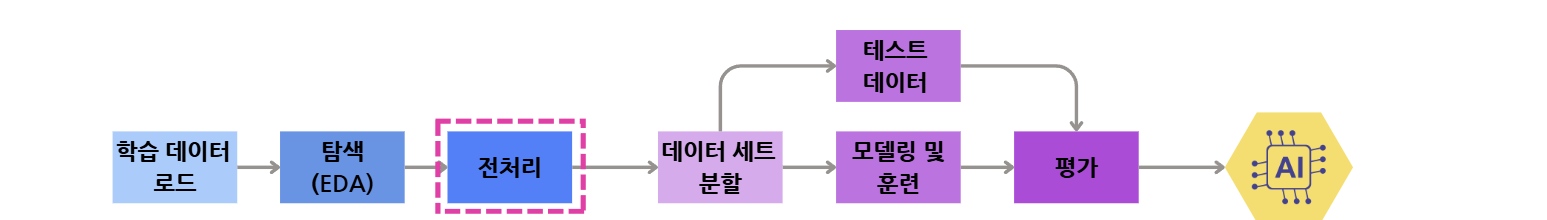

In [1]:
# 미니 데이터 생성
import pandas as pd

df = pd.DataFrame({
    'id': ['a001', 'a002', 'a003', 'a004', 'a005'],
    '가격': [8500, 7800, 7200, 9200, 8000],
    '면중량_g': [100, 125, 90, 150, 110],
    '배달거리_km': [7.5, 10.2, 13.8, 6.7, 12.5],
    '오픈년도': [2018, 2016, 2023, 2022, 2021]
})
df

,id,가격,면중량_g,배달거리_km,오픈년도
0,a001,8500,100,7.5,2018
1,a002,7800,125,10.2,2016
2,a003,7200,90,13.8,2023
3,a004,9200,150,6.7,2022
4,a005,8000,110,12.5,2021


---


## 📌 **핵심 이론 정리**


## **1. 불필요한 컬럼 삭제 - drop()**
분석에 직접 사용되지 않거나 단순 식별 목적의 컬럼은 삭제할 수 있다. (예:001,002,003,...0100)


In [12]:
# 컬럼 삭제
df.drop(columns=['id'],axis=1)

,가격,면중량_g,배달거리_km,오픈년도
0,8500,100,7.5,2018
1,7800,125,10.2,2016
2,7200,90,13.8,2023
3,9200,150,6.7,2022
4,8000,110,12.5,2021


In [13]:
#컬럼이 원본에 유지됨.
df

,id,가격,면중량_g,배달거리_km,오픈년도
0,a001,8500,100,7.5,2018
1,a002,7800,125,10.2,2016
2,a003,7200,90,13.8,2023
3,a004,9200,150,6.7,2022
4,a005,8000,110,12.5,2021


In [14]:
# inplace=True: 원본에 수정 확정
df.drop(columns=['id'],axis=1,inplace=True)
df

,가격,면중량_g,배달거리_km,오픈년도
0,8500,100,7.5,2018
1,7800,125,10.2,2016
2,7200,90,13.8,2023
3,9200,150,6.7,2022
4,8000,110,12.5,2021


## **2. 파생변수 생성**
기존 수치형 변수의 조합으로 의미 있는 새 변수를 만들 수 있다.




In [15]:
#매장연차 = 기준연도(2025) - 오픈년도
df['매장연차'] = 2025 - df['오픈년도']
df

,가격,면중량_g,배달거리_km,오픈년도,매장연차
0,8500,100,7.5,2018,7
1,7800,125,10.2,2016,9
2,7200,90,13.8,2023,2
3,9200,150,6.7,2022,3
4,8000,110,12.5,2021,4


---

## **3. 연속형 변수 구간화**
구간화(Binning)는 연속적인 숫자 데이터를 몇 개의 그룹으로 묶어 패턴을 찾기 쉽게 만들기 위해 필요
### **(1) 분위수 기준 분할:**
```python
    pd.qcut(df[컬럼],q= 나눌 구간 개수, labels=[각 구간에 붙일 이름])
```




In [2]:
df['거리등급']=pd.qcut(df['배달거리_km'], q=2, labels=['근거리', '원거리'])
# df['거리등급']=pd.qcut(df['배달거리_km'], q=3, labels=['근거리', '중거리', '원거리'])
df

,id,가격,면중량_g,배달거리_km,오픈년도,거리등급
0,a001,8500,100,7.5,2018,근거리
1,a002,7800,125,10.2,2016,근거리
2,a003,7200,90,13.8,2023,원거리
3,a004,9200,150,6.7,2022,근거리
4,a005,8000,110,12.5,2021,원거리


### **(2)  직접 경계 설정:**
```python
    pd.cut(df[컬럼],bins= [구간의 경계값], labels=[각 구간에 붙일 이름])
```

In [ ]:
df['배달거리_km'].describe()

,배달거리_km
count,5.000000
mean,10.140000
std,3.072946
min,6.700000
25%,7.500000
50%,10.200000
75%,12.500000
max,13.800000


In [17]:
bins = [0, 7, 12, df['배달거리_km'].max()]
labels = ['근거리', '중거리', '원거리']
df['거리등급'] = pd.cut(df['배달거리_km'], bins=bins, labels=labels)
df

,가격,면중량_g,배달거리_km,오픈년도,매장연차,거리등급
0,8500,100,7.5,2018,7,중거리
1,7800,125,10.2,2016,9,중거리
2,7200,90,13.8,2023,2,원거리
3,9200,150,6.7,2022,3,근거리
4,8000,110,12.5,2021,4,원거리


---

## **연습 문제**

🍜 **짜장면 데이터 분석 연습 문제**

 데이터 분석팀은 각 연도의 최저임금 대비 짜장면 가격이 적절했는지를 평가하는 **'상대적 가격 지수'**를 만들려고 합니다.

이를 위해 다음과 같은 분석을 수행하고자 합니다:

- 파생변수 **costliness_index (최저임금 대비 가격)**를 계산합니다.
→ 이 값이 높을수록 해당 연도의 최저임금에 비해 짜장면이 상대적으로 비쌌다는 의미입니다.

- 이 지수를 기준으로 짜장면의 상대적 가격을 **3단계 등급(고비용, 중간, 저비용)**으로 구분하고자 합니다.



### **문제 1. 분석에 불필요한 'flour_index', 'pork_index', 'onion_index' 컬럼을 삭제하고 `df` 변수에 저장하시오.**

In [4]:
import pandas as pd
# 이 코드를 먼저 실행후 전처리하시오.
df = pd.read_csv('데이터세트/jajang_price.csv')
df.head()

,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
0,2000,36.444365,39.562248,33.170651,30.421736,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800
1,1973,11.043598,12.683397,10.626395,NaN,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700
2,1980,15.622815,14.034484,17.451849,21.881817,326,Seoul,Basic,Normal,0,7.4,1300
3,2011,61.829747,56.947619,74.465223,66.331692,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850
4,1981,16.772157,15.112856,15.336770,22.060043,350,Incheon,Ganjjajang,Franchise,0,2.2,2350


In [5]:
# 여기에 코드를 작성하세요.
df.drop(columns=['flour_index','pork_index','onion_index'],axis=1,inplace=True)
df

,year,cpi,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
0,2000,36.444365,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800
1,1973,11.043598,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700
2,1980,15.622815,326,Seoul,Basic,Normal,0,7.4,1300
3,2011,61.829747,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850
4,1981,16.772157,350,Incheon,Ganjjajang,Franchise,0,2.2,2350
...,...,...,...,...,...,...,...,...,...
7995,1971,10.233665,214,Daegu,Basic,Normal,0,11.6,50
7996,1999,37.129960,1600,Gyeonggi,Ganjjajang,Normal,0,2.3,2700
7997,1975,12.784739,267,Gyeonggi,Basic,Normal,0,1.4,700
7998,2011,61.798144,4320,Gwangju,Samseon,Normal,0,14.3,4650


### **문제 2. 'price'(자장면 가격)와 'minimum_wage'(최저임금)를 이용하여 'costliness_index'(최저임금 대비 가격) 컬럼을 생성하시오.**
* `costliness_index` = `price` / `minimum_wage`
* 결과는 소수점 둘째 자리까지 반올림하세요.
    - np.round(123.456,2) 출력 결과: 123.46

In [10]:
# 여기에 코드를 작성하세요
import numpy as np

df['costliness_index']=np.round(df['price']/df['minimum_wage'],2)
df

,year,cpi,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price,costliness_index
0,2000,36.444365,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800,1.50
1,1973,11.043598,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700,7.36
2,1980,15.622815,326,Seoul,Basic,Normal,0,7.4,1300,3.99
3,2011,61.829747,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850,1.12
4,1981,16.772157,350,Incheon,Ganjjajang,Franchise,0,2.2,2350,6.71
...,...,...,...,...,...,...,...,...,...,...
7995,1971,10.233665,214,Daegu,Basic,Normal,0,11.6,50,0.23
7996,1999,37.129960,1600,Gyeonggi,Ganjjajang,Normal,0,2.3,2700,1.69
7997,1975,12.784739,267,Gyeonggi,Basic,Normal,0,1.4,700,2.62
7998,2011,61.798144,4320,Gwangju,Samseon,Normal,0,14.3,4650,1.08


### **문제 3. 생성된 'costliness_index' 값을 기준으로 다음과 같이 등급을 나누고 'cost_grade' 컬럼으로 저장하시오.**
  - 분위수 기준(`qcut`)으로 3등급으로 구분
  - 등급 라벨은 'high', 'medium', 'low' 순서로 지정할 것 (값이 높을수록 'high' 등급)

In [13]:
# 여기에 코드를 작성하세요
df['cost_grade']=pd.qcut(df['costliness_index'],q=3,labels=['low','medium','high'])
df

,year,cpi,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price,costliness_index,cost_grade
0,2000,36.444365,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800,1.50,medium
1,1973,11.043598,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700,7.36,high
2,1980,15.622815,326,Seoul,Basic,Normal,0,7.4,1300,3.99,high
3,2011,61.829747,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850,1.12,medium
4,1981,16.772157,350,Incheon,Ganjjajang,Franchise,0,2.2,2350,6.71,high
...,...,...,...,...,...,...,...,...,...,...,...
7995,1971,10.233665,214,Daegu,Basic,Normal,0,11.6,50,0.23,low
7996,1999,37.129960,1600,Gyeonggi,Ganjjajang,Normal,0,2.3,2700,1.69,medium
7997,1975,12.784739,267,Gyeonggi,Basic,Normal,0,1.4,700,2.62,high
7998,2011,61.798144,4320,Gwangju,Samseon,Normal,0,14.3,4650,1.08,medium


## **도전 문제**

### **문제 1. 앞에서 생성한 상대적 비용 등급(`cost_grade`)에 따른 평균 쿠폰 할인율(`coupon_discount`)을 비교하시오.**

- x축: `cost_grade`, y축: `coupon_discount`인 barplot을 출력하시오.
- `seaborn` 라이브러리를 사용하시오.





<Axes: xlabel='cost_grade', ylabel='coupon_discount'>

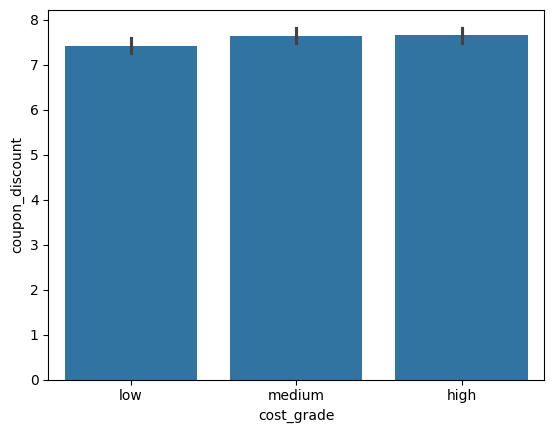

In [15]:
# 여기에 코드를 작성하세요
import seaborn as sns

sns.barplot(x=df['cost_grade'],y=df['coupon_discount'])

### **문제 2. 시각화 결과에 대한 해석으로 가장 적절한 것을 '답안02' 변수에 저장하시오.**

(전제: `costliness_index`가 높을수록 'high' 등급으로 분류됨)

1.  상대적으로 저비용인 짜장면일수록 평균 할인율이 높다.
2.  비용 등급과 쿠폰 할인율은 별다른 관계가 없어 보인다.
3.  상대적으로 고비용인 짜장면일수록 평균 할인율이 압도적으로 높은 경향이 있다.
4.  'medium' 등급의 평균 할인율이 가장 낮다.

In [ ]:
# 여기에 코드를 작성하세요